In [ ]:
!pip install kaggle
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d moltean/fruits

!unzip ./fruits.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [ ]:
import tensorflow as tf
import keras
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
traning_file="./fruits-360-original-size/fruits-360-original-size/Training"
test_file="./fruits-360-original-size/fruits-360-original-size/Test"
validation_file="./fruits-360-original-size/fruits-360-original-size/Validation"

In [ ]:
traning_file_image=glob(traning_file+"/*/*.jp*g")
test_file_image=glob(test_file+"/*/*.jp*g")
validation_file_image=glob(validation_file+"/*/*.jp*g")

In [ ]:
gen=keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,vertical_flip=True
                                             ,shear_range=0.1,width_shift_range=1.0,
                                             height_shift_range=0.1,
                                             zoom_range=0.1,
                                             preprocessing_function=keras.applications.vgg16.preprocess_input)

In [ ]:
training_data=gen.flow_from_directory(traning_file,target_size=(100,100))

Found 6231 images belonging to 24 classes.


In [ ]:
test_data=gen.flow_from_directory(test_file,target_size=(100,100))

Found 3110 images belonging to 24 classes.


In [ ]:
validation_data=gen.flow_from_directory(validation_file,target_size=(100,100))

Found 3114 images belonging to 24 classes.


In [ ]:
vgg=keras.applications.vgg16.VGG16(include_top=False,input_shape=(100,100,3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
x=keras.layers.Flatten()(vgg.output)
x=keras.layers.Dense(24,activation="softmax")(x)

In [ ]:
model=keras.Model(vgg.input,x)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [ ]:
history=model.fit(training_data,batch_size=32,epochs=10,
          steps_per_epoch=len(traning_file_image)//32,
          validation_data=validation_data,
          validation_steps=len(validation_file_image)//32
          )

Epoch 1/20
194/194 [==============================] - 72s 304ms/step - loss: 2.6933 - accuracy: 0.8106 - val_loss: 0.5112 - val_accuracy: 0.9485
Epoch 2/20
194/194 [==============================] - 57s 293ms/step - loss: 0.5029 - accuracy: 0.9510 - val_loss: 0.3989 - val_accuracy: 0.9617
Epoch 3/20
194/194 [==============================] - 57s 293ms/step - loss: 0.2911 - accuracy: 0.9698 - val_loss: 0.0784 - val_accuracy: 0.9884
Epoch 4/20
194/194 [==============================] - 57s 294ms/step - loss: 0.1821 - accuracy: 0.9824 - val_loss: 0.1793 - val_accuracy: 0.9823
Epoch 5/20
194/194 [==============================] - 58s 297ms/step - loss: 0.1450 - accuracy: 0.9845 - val_loss: 0.0756 - val_accuracy: 0.9903
Epoch 6/20
194/194 [==============================] - 57s 296ms/step - loss: 0.1352 - accuracy: 0.9858 - val_loss: 0.0477 - val_accuracy: 0.9942
Epoch 7/20
194/194 [==============================] - 58s 299ms/step - loss: 0.1110 - accuracy: 0.9885 - val_loss: 0.0821 - val_ac

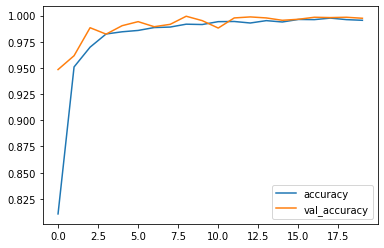

In [ ]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

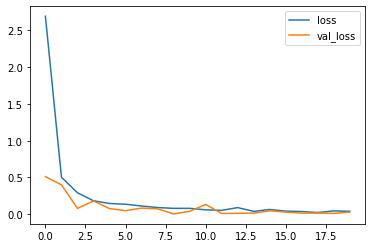

In [ ]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     